In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
import sys
sys.path.append("/Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/Kostas/labStuff/dmcdb_py")

In [6]:
#from readSessionsServer import SessionIterator

In [7]:
state_order = {
    'initRight': 0,
    'initLeft': 0,
    'mainRunLeft': 1,
    'turnMainToLeft': 2,
    'leftRun': 3,
    'leftReward': 4
}

In [52]:
# Day 1
# animal1: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal1/Particle Filter/20211016_163921_animal1learnday1_particlefilter.h5
# animal2: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal2/Particle Filter/20211016_170522_animal2learnday1_particlefilter.h5
# animal3: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal3/Particle Filter/20211016_173112_animal3learnday1_particlefilter.h5

# Day 11
# animal1: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal1/Particle Filter/20211028_171719_animal1learnday11.h5
# animal2: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal2/Particle Filter/20211028_174510_animal2learnday11.h5
# animal3: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal3/Particle Filter/20211028_181307_animal3learnday11.h5

# Reading the h5 file that contains particle filter
pathname = input("Insert path of particle filter h5 file here: ") # /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal1/Particle Filter/20211016_163921_animal1learnday1_particlefilter.h5

with pd.HDFStore(pathname) as hdf:
    # This prints a list of all group names:
    print("Reading the h5 file that contains the deeplabcut and calcium imaging data...")
    print(hdf.keys())

filtered = pd.read_hdf(pathname)

Insert path of particle filter h5 file here:  /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal3/Particle Filter/20211028_181307_animal3learnday11.h5


Reading the h5 file that contains the deeplabcut and calcium imaging data...
['/20211028_181307_animal3learnday11']


In [53]:
# Day 1
# animal1: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal1/Behavior segmentation/20211016_163921_animal1learnday1_behavior_segmentation.h5
# animal2: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal2/Behavior segmentation/20211016_170522_animal2learnday1_behavior_segmentation.h5
# animal3: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal3/Behavior segmentation/20211016_173112_animal3learnday1_behavior_segmentation.h5

# Day 11
# animal1: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal1/Behavior segmentation/20211028_171719_animal1learnday11 (1).h5
# animal2: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal2/Behavior segmentation/20211028_174510_animal2learnday11.h5
# animal3: /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal3/Behavior segmentation/20211028_181307_animal3learnday11.h5

# Reading the h5 file that contains behavior segmentation
pathname_2 = input("Insert path of behavior segmentation h5 file here: ") # /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal1/Behavior segmentation/20211016_163921_animal1learnday1_behavior_segmentation.h5

with pd.HDFStore(pathname_2) as hdf:
    # This prints a list of all group names:
    print("Reading the h5 file that contains the deeplabcut and calcium imaging data...")
    print(hdf.keys())

segmented = pd.read_hdf(pathname_2, key="/per_frame")

Insert path of behavior segmentation h5 file here:  /Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Learning Day 11/Animal3/Behavior segmentation/20211028_181307_animal3learnday11.h5


Reading the h5 file that contains the deeplabcut and calcium imaging data...
['/per_frame', '/per_segment']


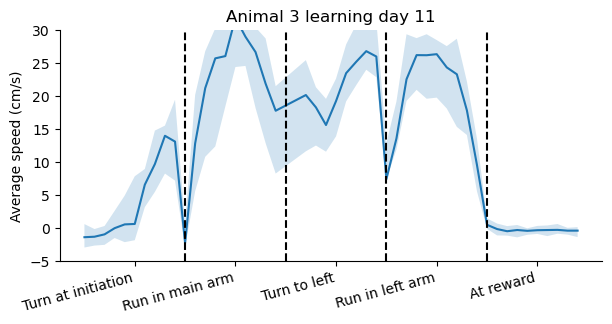

In [55]:
n_bins_per_seg = 10
# for sess in SessionIterator("Miniscope recordings").findSessions():
# filtered = pd.read_hdf("/Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal1/Particle Filter/20211016_163921_animal1learnday1_particlefilter.h5") # Particle Filter
# segmented = pd.read_hdf("/Users/pierre.le.merre/OneDrive - KI.SE/Mac/Desktop/KIlab/data-files/Animal1/Behavior segmentation/20211016_163921_animal1learnday1_behavior_segmentation.h5") # Behavior segmentation
state_order_series = pd.Series(state_order, name="state_order")
segmented_relevant = segmented.join(state_order_series, on="state_name")
x_pos = segmented_relevant.spatial_progress + segmented_relevant.state_order
speeds = filtered.speed[np.isfinite(x_pos)]
bin_x = np.floor(x_pos[np.isfinite(x_pos)]*n_bins_per_seg).astype(int)
gby = (60*speeds).groupby([bin_x, segmented_relevant.segment_no]).mean().groupby(level=0)
medians = gby.median()
low_q = gby.quantile(0.25)
high_q = gby.quantile(0.75)
N_trials = len(segmented[segmented.state_name == "leftReward"].segment_no.unique())
plt.figure(figsize=(7, 3))
plt.plot(medians)
plt.fill_between(medians.index, low_q, high_q, alpha=.2)
#plt.text(0.9, 0.85, f"N={N_trials} trials", ha="right", transform=plt.gca().transAxes)
plt.title("Animal 3 learning day 11")
labels = ["Turn at initiation", "Run in main arm", "Turn to left", "Run in left arm", "At reward"]
for i in range(1, 5):
    plt.axvline(i*n_bins_per_seg, color='k', linestyle='--')
plt.xticks((np.arange(5)+0.5)*n_bins_per_seg, labels, rotation=15, ha="right")
plt.ylabel("Average speed (cm/s)")
plt.ylim(-5, 30)
sns.despine()
plt.show()